In [1]:
import pandas as pd
import statistics
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import style

In [2]:
def best_configuration_per_fold(dataset, no_folds):
    best_configuration = pd.DataFrame(columns=dataset.columns)
    
    for i in range(1, no_folds+1):
        subset_fold = dataset.loc[dataset["validation_fold"]=="fold "+str(i)]
        index_lowest_loss = subset_fold["validation_loss"].idxmin()
        row = dataset.iloc[index_lowest_loss].to_dict()
        best_configuration= best_configuration.append(row, ignore_index = True)

    return best_configuration

In [3]:
def performance_each_configuration_over_all_folds(dataset, no_folds):
    mean_each_configuration = pd.DataFrame(columns=dataset.columns)
    no_configurations = int(dataset.shape[0] / no_folds)
    
    for i in range(no_configurations):
        validation_losses = []
        current_configuration = dataset.iloc[i,:].drop(labels=["validation_fold", "training_loss", "validation_loss"])
        for fold in range(1,no_folds+1):
            subset_fold = dataset.loc[dataset["validation_fold"]=="fold "+str(fold)]
            loss_current_fold = subset_fold["validation_loss"].iloc[i]
            validation_losses.append(loss_current_fold)
        
        current_configuration["mean loss"] = round(statistics.mean(validation_losses),4)
        mean_each_configuration = mean_each_configuration.append(current_configuration.to_dict(), ignore_index = True)

    return mean_each_configuration.dropna(axis=1)

## Dataset

In [7]:
method = "MSE"
#dataset = "artifical_data_configurations.csv"
dataset = "cpps_configurations.csv"
#dataset = "phm67_configurations.csv"

In [6]:
method = "MLE"
#dataset = "MLE1_artifical_data_configurations.csv"
dataset = "MLE1_cpps_configurations.csv"
#dataset = "MLE1_phm67_configurations.csv"

In [7]:
results = pd.read_csv("../../../models/cross_validation/{}/{}".format(method, dataset), sep=";")

# Get statistics

In [8]:
best_configuration = best_configuration_per_fold(dataset=results, no_folds=4)
best_configuration.head()

,validation_fold,validation_loss,training_loss,n_hidden_lstm,sequence_length,n_lstm_layer,n_hidden_fc,Unnamed: 7
0,fold 1,-0.687631,-0.479083,21,8,1,55,NaN
1,fold 2,-0.802858,-0.491101,21,8,1,55,NaN
2,fold 3,-0.691336,-0.537980,21,21,1,55,NaN
3,fold 4,-0.029548,-0.493402,13,8,1,55,NaN


In [9]:
performance_config = performance_each_configuration_over_all_folds(dataset=results, no_folds=4)
final_results = performance_config.sort_values(by=['mean loss'])
final_results = final_results.rename(columns={"n_hidden_lstm": "Hidden units LSTM", 
                                              "sequence_length": "Sequence lenght",
                                              "n_lstm_layer": "LSTM layer",
                                              "n_hidden_fc": "Hidden units FC",
                                              "mean loss": "Mean loss",
                                              })
final_results = final_results.iloc[:8,:]
final_results.head(50)

,Hidden units LSTM,Sequence lenght,LSTM layer,Hidden units FC,Mean loss
8,21.0,8.0,1.0,55.0,-0.5251
17,21.0,21.0,1.0,55.0,-0.5189
26,21.0,55.0,1.0,55.0,-0.5107
5,13.0,8.0,1.0,55.0,-0.5042
14,13.0,21.0,1.0,55.0,-0.5017
23,13.0,55.0,1.0,55.0,-0.4929
2,5.0,8.0,1.0,55.0,-0.3778
11,5.0,21.0,1.0,55.0,-0.3658


## Results of Grid Search

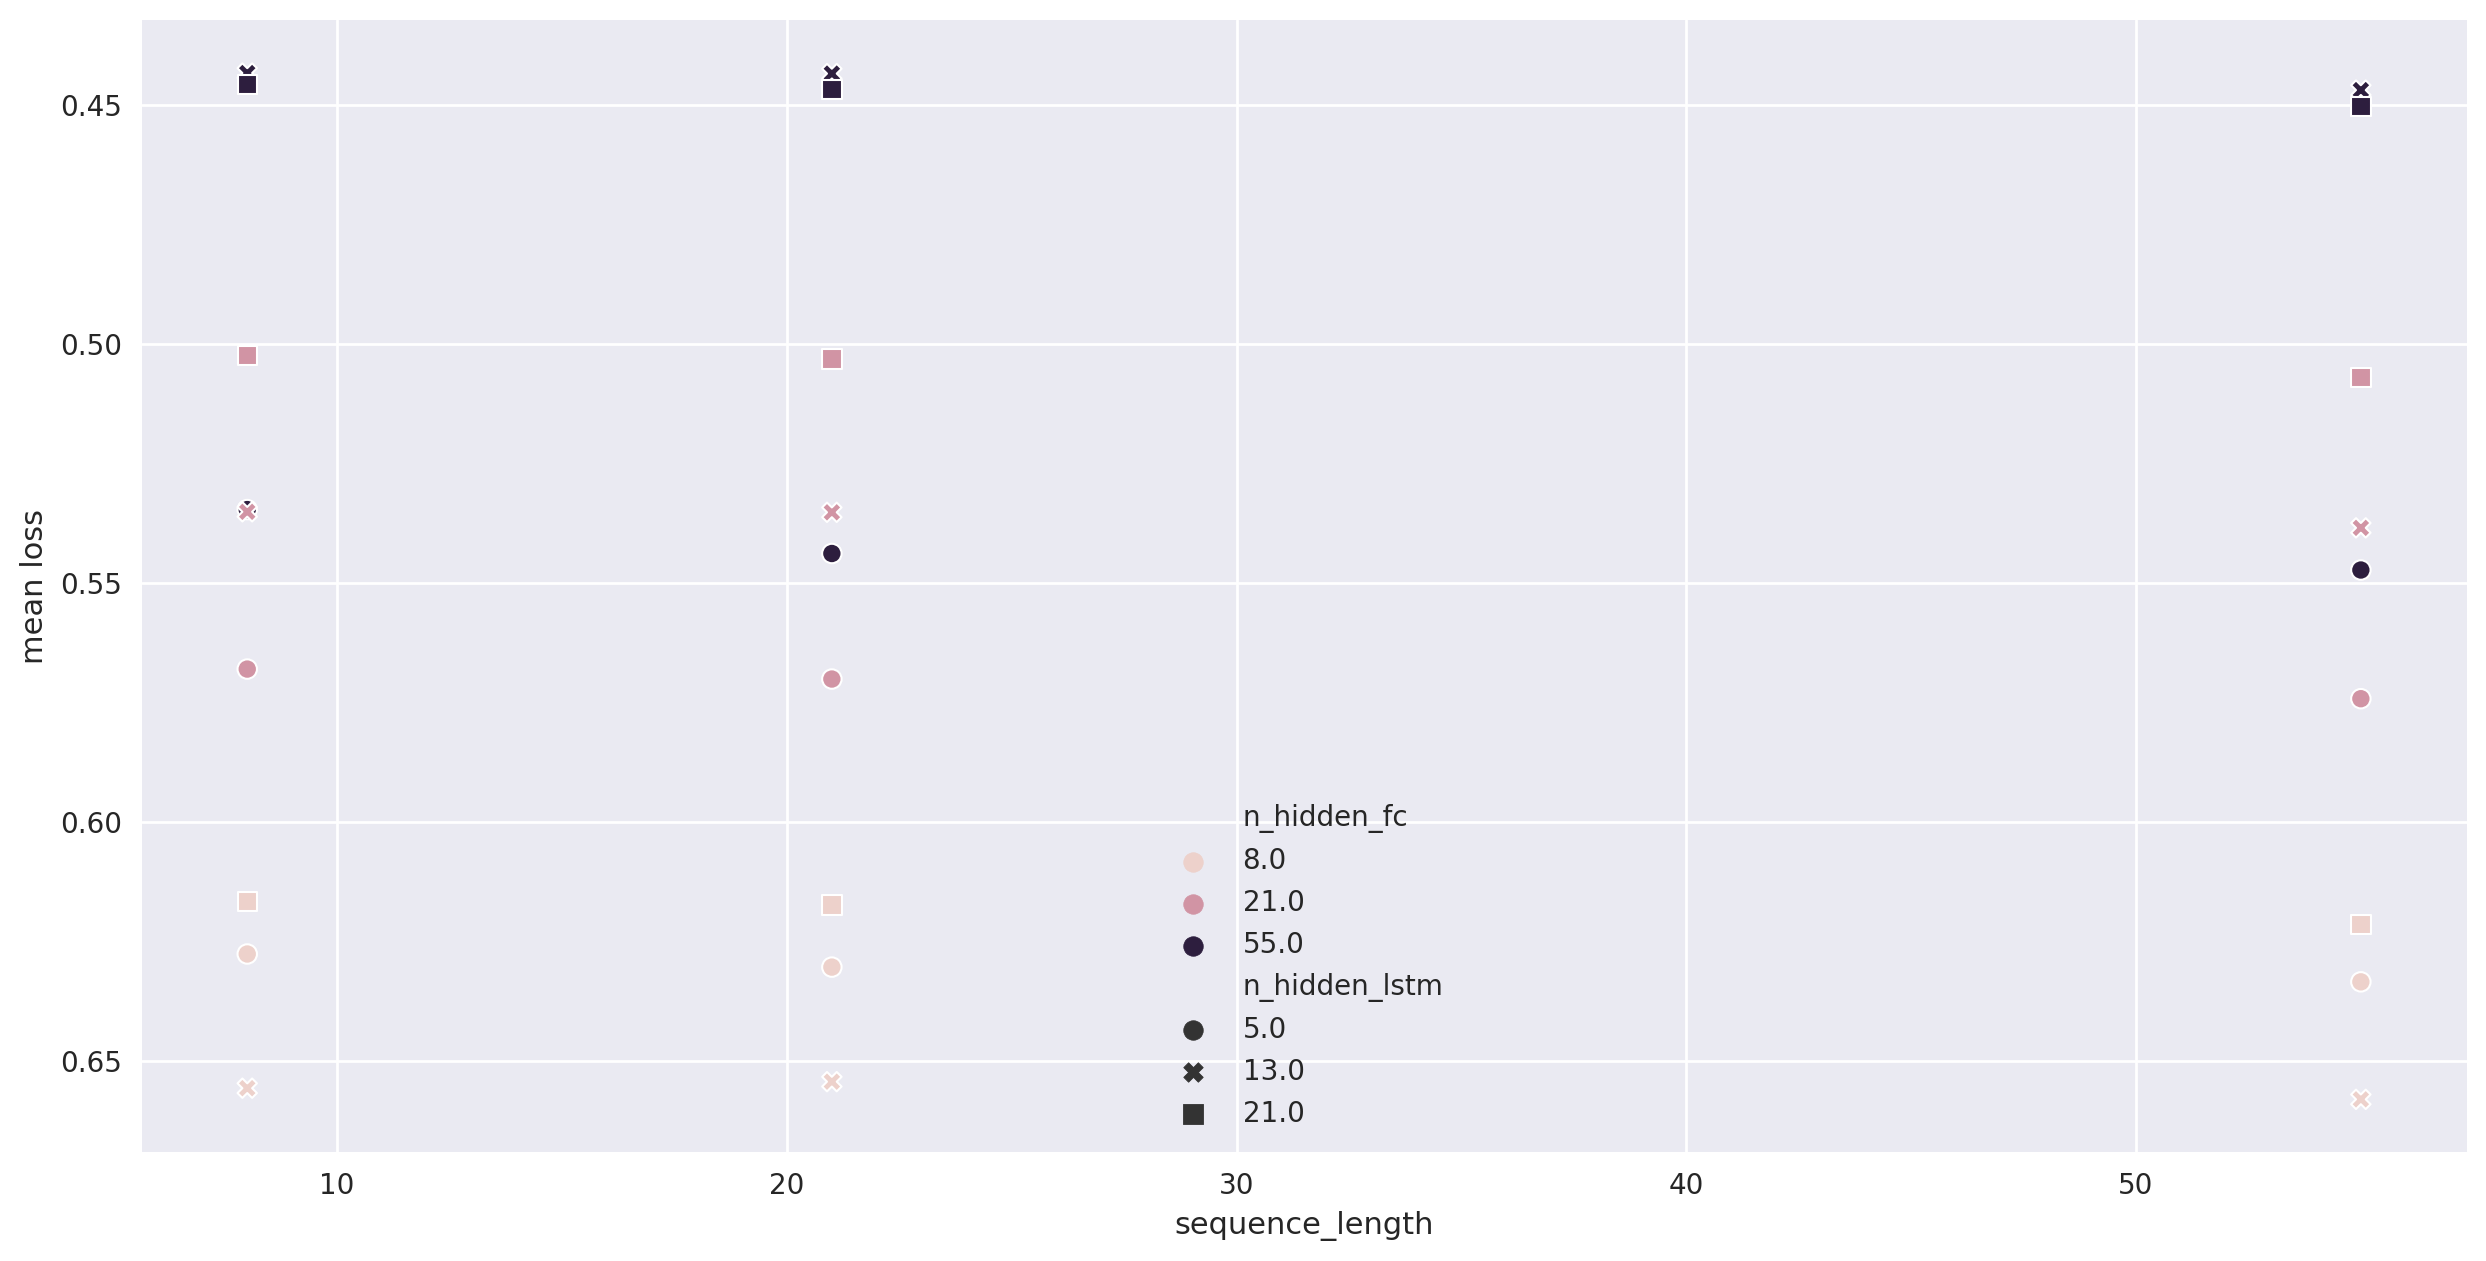

In [102]:
style.use("seaborn")
f, ax = plt.subplots(figsize=(15,7.5), dpi=200)
sns.scatterplot(x="sequence_length", y="mean loss", data=performance_config, hue="n_hidden_fc", style="n_hidden_lstm",
                ax=ax, legend="full", sizes=(100, 300))
plt.gca().invert_yaxis()
plt.show()

## Store results

In [19]:
#name_file = "artificalDataConfigurations.csv"
name_file = "cppsConfigurations.csv"
#name_file = "phm67Configurations.csv"

In [20]:
final_results.to_csv("./{}/{}".format(method, name_file), sep=";", index=False)